# Classification with different Machine learning algorithms (Traditional)

# importing libraries

In [37]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
import pandas as pd

from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.metrics import classification_report
from skimage.feature import greycomatrix, greycoprops

from sklearn.model_selection import StratifiedKFold

In [38]:
dire="D:/Individual_Trees_photos/nonlinearimages"
categories= ['European beech', 'European silver fir', 'Norway spruce', 'Sessile oak']

data =[]
SIZE = 200
images =[]
label1 =[]
for category in categories:
    path = os.path.join(dire, category)
    label = categories.index(category)
    
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        tree_img = cv2.imread(imgpath,0)
        try:
            tree_img = cv2.resize(tree_img, (SIZE, SIZE)) #Resize images
            #tree_img = cv2.resize(tree_img,(50,50))
            image = np.array(tree_img).flatten()
        
            #data.append([image, label])
            images.append(tree_img)
            label1.append(label)
        except Exception as e:
            pass
images=np.array(images)   

In [39]:
# FEATURE EXTRACTOR function
# input shape is (n, x, y, c) - number of images, x, y, and channels
def feature_extractor(dataset):
    image_dataset = pd.DataFrame()
    for image in range(dataset.shape[0]):  #iterate through each file 
        #print(image)
        
        df = pd.DataFrame()  #Temporary data frame to capture information for each loop.
        #Reset dataframe to blank after each loop.
        
        img = dataset[image, :,:]
        
        #Full image
        #GLCM = greycomatrix(img, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4])
        GLCM = greycomatrix(img, [1], [0])       
        GLCM_Energy = greycoprops(GLCM, 'energy')[0]
        df['Energy'] = GLCM_Energy
        GLCM_corr = greycoprops(GLCM, 'correlation')[0]
        df['Corr'] = GLCM_corr       
        GLCM_diss = greycoprops(GLCM, 'dissimilarity')[0]
        df['Diss_sim'] = GLCM_diss       
        GLCM_hom = greycoprops(GLCM, 'homogeneity')[0]
        df['Homogen'] = GLCM_hom       
        GLCM_contr = greycoprops(GLCM, 'contrast')[0]
        df['Contrast'] = GLCM_contr
        
        GLCM2 = greycomatrix(img, [3], [0])       
        GLCM_Energy2 = greycoprops(GLCM2, 'energy')[0]
        df['Energy2'] = GLCM_Energy2
        GLCM_corr2 = greycoprops(GLCM2, 'correlation')[0]
        df['Corr2'] = GLCM_corr2       
        GLCM_diss2 = greycoprops(GLCM2, 'dissimilarity')[0]
        df['Diss_sim2'] = GLCM_diss2       
        GLCM_hom2 = greycoprops(GLCM2, 'homogeneity')[0]
        df['Homogen2'] = GLCM_hom2       
        GLCM_contr2 = greycoprops(GLCM2, 'contrast')[0]
        df['Contrast2'] = GLCM_contr2

        GLCM3 = greycomatrix(img, [5], [0])       
        GLCM_Energy3 = greycoprops(GLCM3, 'energy')[0]
        df['Energy3'] = GLCM_Energy3
        GLCM_corr3 = greycoprops(GLCM3, 'correlation')[0]
        df['Corr3'] = GLCM_corr3       
        GLCM_diss3 = greycoprops(GLCM3, 'dissimilarity')[0]
        df['Diss_sim3'] = GLCM_diss3       
        GLCM_hom3 = greycoprops(GLCM3, 'homogeneity')[0]
        df['Homogen3'] = GLCM_hom3       
        GLCM_contr3 = greycoprops(GLCM3, 'contrast')[0]
        df['Contrast3'] = GLCM_contr3
        
        GLCM4 = greycomatrix(img, [0], [np.pi/4])       
        GLCM_Energy4 = greycoprops(GLCM4, 'energy')[0]
        df['Energy4'] = GLCM_Energy4
        GLCM_corr4 = greycoprops(GLCM4, 'correlation')[0]
        df['Corr4'] = GLCM_corr4       
        GLCM_diss4 = greycoprops(GLCM4, 'dissimilarity')[0]
        df['Diss_sim4'] = GLCM_diss4       
        GLCM_hom4 = greycoprops(GLCM4, 'homogeneity')[0]
        df['Homogen4'] = GLCM_hom4       
        GLCM_contr4 = greycoprops(GLCM4, 'contrast')[0]
        df['Contrast4'] = GLCM_contr4
        
        GLCM5 = greycomatrix(img, [0], [np.pi/2])       
        GLCM_Energy5 = greycoprops(GLCM5, 'energy')[0]
        df['Energy5'] = GLCM_Energy5
        GLCM_corr5 = greycoprops(GLCM5, 'correlation')[0]
        df['Corr5'] = GLCM_corr5       
        GLCM_diss5 = greycoprops(GLCM5, 'dissimilarity')[0]
        df['Diss_sim5'] = GLCM_diss5       
        GLCM_hom5 = greycoprops(GLCM5, 'homogeneity')[0]
        df['Homogen5'] = GLCM_hom5       
        GLCM_contr5 = greycoprops(GLCM5, 'contrast')[0]
        df['Contrast5'] = GLCM_contr5
        
        #Add more filters as needed
        #entropy = shannon_entropy(img)
        #df['Entropy'] = entropy

        
        #Append features from current image to the dataset
        image_dataset = image_dataset.append(df)
        
    return image_dataset

In [40]:
#Extract features from images
image_features = feature_extractor(images)
X_for_ML =image_features


In [41]:
image_features

,Energy,Corr,Diss_sim,Homogen,Contrast,Energy2,Corr2,Diss_sim2,Homogen2,Contrast2,...,Energy4,Corr4,Diss_sim4,Homogen4,Contrast4,Energy5,Corr5,Diss_sim5,Homogen5,Contrast5
0,0.255187,0.932171,4.983015,0.504260,403.309950,0.242473,0.699581,11.772437,0.401143,1540.405990,...,0.293423,1.0,0.0,1.0,0.0,0.293423,1.0,0.0,1.0,0.0
0,0.256293,0.925416,4.713668,0.526939,461.663618,0.244266,0.706665,11.288426,0.424282,1589.079340,...,0.289706,1.0,0.0,1.0,0.0,0.289706,1.0,0.0,1.0,0.0
0,0.313438,0.933670,4.252864,0.585108,450.575628,0.302088,0.733057,10.716701,0.475601,1592.665431,...,0.340975,1.0,0.0,1.0,0.0,0.340975,1.0,0.0,1.0,0.0
0,0.332475,0.931593,4.138040,0.602127,494.713719,0.321501,0.750918,10.386650,0.500219,1603.805990,...,0.357175,1.0,0.0,1.0,0.0,0.357175,1.0,0.0,1.0,0.0
0,0.268853,0.913366,5.788090,0.477033,549.372261,0.257164,0.696494,13.005990,0.394667,1675.986142,...,0.294188,1.0,0.0,1.0,0.0,0.294188,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.372707,0.916956,9.065678,0.486788,651.007337,0.363703,0.706037,19.900254,0.433146,2072.064112,...,0.381888,1.0,0.0,1.0,0.0,0.381888,1.0,0.0,1.0,0.0
0,0.508327,0.960415,6.150854,0.623526,341.870402,0.501245,0.789197,14.916548,0.573424,1642.710761,...,0.514035,1.0,0.0,1.0,0.0,0.514035,1.0,0.0,1.0,0.0
0,0.493576,0.919675,5.888141,0.613431,605.102211,0.485419,0.712512,14.274670,0.554352,1902.535127,...,0.500613,1.0,0.0,1.0,0.0,0.500613,1.0,0.0,1.0,0.0
0,0.440162,0.921668,6.106332,0.577539,576.261558,0.431290,0.710945,14.761371,0.508782,1865.724162,...,0.448950,1.0,0.0,1.0,0.0,0.448950,1.0,0.0,1.0,0.0


# Train and test data split 

In [42]:
#train test

x1train, x1test, ytrain, ytest = train_test_split(X_for_ML, label1, test_size =0.25)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
xtrain = scaler.fit_transform(x1train)
xtest = scaler.fit_transform(x1test)

# Machine learning Algorithms

## Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 40)
classifier.fit(xtrain, ytrain)


RandomForestClassifier(n_estimators=40)

In [45]:
print("Accuracy on training set: {:.3f}".format(classifier.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(classifier.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.728


In [46]:
from sklearn.metrics import classification_report
predictions = classifier.predict(xtest)
print (classification_report(ytest, predictions))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        22
           1       0.50      0.58      0.54        19
           2       0.47      0.53      0.50        17
           3       0.95      0.78      0.86        23

    accuracy                           0.73        81
   macro avg       0.73      0.71      0.72        81
weighted avg       0.76      0.73      0.74        81



<AxesSubplot:>

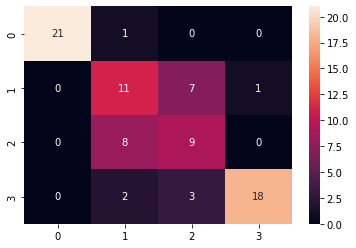

In [47]:
matrix= confusion_matrix(ytest, predictions)

sns.heatmap(matrix,annot = True, fmt = "d")

In [48]:
# Train model multiple times to find the highest accuracy
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    classifier = RandomForestClassifier(n_estimators = 40)
    classifier.fit(xtrain, ytrain)

    
    acc = classifier.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
       
print("Highest Accuracy:", best)

Accuracy: 0.7160493827160493
Accuracy: 0.7407407407407407
Accuracy: 0.7283950617283951
Accuracy: 0.6172839506172839
Accuracy: 0.691358024691358
Accuracy: 0.6790123456790124
Accuracy: 0.6049382716049383
Accuracy: 0.7160493827160493
Accuracy: 0.691358024691358
Accuracy: 0.6296296296296297
Accuracy: 0.6419753086419753
Accuracy: 0.7160493827160493
Accuracy: 0.7407407407407407
Accuracy: 0.7407407407407407
Accuracy: 0.654320987654321
Accuracy: 0.7407407407407407
Accuracy: 0.691358024691358
Accuracy: 0.6790123456790124
Accuracy: 0.7160493827160493
Accuracy: 0.7777777777777778
Accuracy: 0.7283950617283951
Accuracy: 0.7283950617283951
Accuracy: 0.654320987654321
Accuracy: 0.7283950617283951
Accuracy: 0.7160493827160493
Accuracy: 0.7283950617283951
Accuracy: 0.7160493827160493
Accuracy: 0.6666666666666666
Accuracy: 0.7283950617283951
Accuracy: 0.7283950617283951
Accuracy: 0.691358024691358
Accuracy: 0.691358024691358
Accuracy: 0.6666666666666666
Accuracy: 0.654320987654321
Accuracy: 0.6790123456

## K-Neighbors 

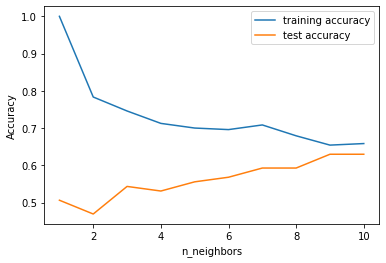

In [49]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(xtrain, ytrain)
    # record training set accuracy
    training_accuracy.append(knn.score(xtrain, ytrain))
    # record test set accuracy
    test_accuracy.append(knn.score(xtest, ytest))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [50]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(xtrain, ytrain)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(xtrain, ytrain)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(xtest, ytest)))

Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.53


In [51]:
predictions1 = knn.predict(xtest)
print (classification_report(ytest, predictions1))

              precision    recall  f1-score   support

           0       0.70      0.80      0.74        20
           1       0.39      0.37      0.38        19
           2       0.47      0.45      0.46        20
           3       0.52      0.50      0.51        22

    accuracy                           0.53        81
   macro avg       0.52      0.53      0.52        81
weighted avg       0.52      0.53      0.53        81



In [52]:
# Train model multiple times to find the highest accuracy
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    knn = KNeighborsClassifier(n_neighbors=4)
    knn.fit(xtrain, ytrain)

    
    acc = knn.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(knn, f)
print("Highest Accuracy:", best)

Accuracy: 0.5679012345679012
Accuracy: 0.5802469135802469
Accuracy: 0.5679012345679012
Accuracy: 0.5925925925925926
Accuracy: 0.5802469135802469
Accuracy: 0.5308641975308642
Accuracy: 0.5555555555555556
Accuracy: 0.5555555555555556
Accuracy: 0.5679012345679012
Accuracy: 0.6172839506172839
Accuracy: 0.5555555555555556
Accuracy: 0.5061728395061729
Accuracy: 0.6049382716049383
Accuracy: 0.5308641975308642
Accuracy: 0.5432098765432098
Accuracy: 0.5185185185185185
Accuracy: 0.4444444444444444
Accuracy: 0.49382716049382713
Accuracy: 0.4691358024691358
Accuracy: 0.5679012345679012
Accuracy: 0.6419753086419753
Accuracy: 0.5432098765432098
Accuracy: 0.5061728395061729
Accuracy: 0.4691358024691358
Accuracy: 0.5555555555555556
Accuracy: 0.43209876543209874
Accuracy: 0.4567901234567901
Accuracy: 0.41975308641975306
Accuracy: 0.5432098765432098
Accuracy: 0.6172839506172839
Accuracy: 0.5802469135802469
Accuracy: 0.5925925925925926
Accuracy: 0.5679012345679012
Accuracy: 0.5679012345679012
Accuracy: 0

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(tree.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.580


In [54]:
tree = DecisionTreeClassifier(max_depth=4, random_state=1)
tree.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(tree.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest, ytest)))


Accuracy on training set: 0.775
Accuracy on test set: 0.605


In [55]:
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    tree = DecisionTreeClassifier(max_depth=4, random_state=1)
    tree.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(tree, f)
print("Highest Accuracy:", best)

Accuracy: 0.5061728395061729
Accuracy: 0.5679012345679012
Accuracy: 0.691358024691358
Accuracy: 0.6790123456790124
Accuracy: 0.6666666666666666
Accuracy: 0.6666666666666666
Accuracy: 0.5925925925925926
Accuracy: 0.6666666666666666
Accuracy: 0.5679012345679012
Accuracy: 0.6666666666666666
Accuracy: 0.5679012345679012
Accuracy: 0.6666666666666666
Accuracy: 0.5925925925925926
Accuracy: 0.654320987654321
Accuracy: 0.691358024691358
Accuracy: 0.5555555555555556
Accuracy: 0.5802469135802469
Accuracy: 0.7283950617283951
Accuracy: 0.6790123456790124
Accuracy: 0.7160493827160493
Accuracy: 0.7160493827160493
Accuracy: 0.7037037037037037
Accuracy: 0.5679012345679012
Accuracy: 0.5925925925925926
Accuracy: 0.6172839506172839
Accuracy: 0.5925925925925926
Accuracy: 0.6296296296296297
Accuracy: 0.7160493827160493
Accuracy: 0.691358024691358
Accuracy: 0.6172839506172839
Accuracy: 0.7283950617283951
Accuracy: 0.5555555555555556
Accuracy: 0.654320987654321
Accuracy: 0.5308641975308642
Accuracy: 0.5925925

# RandomForest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(rf.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.753


In [57]:
rf1 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=1)
rf1.fit(xtrain, ytrain)
print("Accuracy on training set: {:.3f}".format(rf1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(rf1.score(xtest, ytest)))

Accuracy on training set: 0.996
Accuracy on test set: 0.728


In [58]:
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    rf1 = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=1)
    rf1.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(rf1, f)
print("Highest Accuracy:", best)

Accuracy: 0.7654320987654321
Accuracy: 0.7160493827160493
Accuracy: 0.7530864197530864
Accuracy: 0.7407407407407407
Accuracy: 0.8024691358024691
Accuracy: 0.7777777777777778
Accuracy: 0.8148148148148148
Accuracy: 0.7160493827160493
Accuracy: 0.7901234567901234
Accuracy: 0.7777777777777778
Accuracy: 0.7037037037037037
Accuracy: 0.7407407407407407
Accuracy: 0.8641975308641975
Accuracy: 0.7654320987654321
Accuracy: 0.7777777777777778
Accuracy: 0.8024691358024691
Accuracy: 0.8148148148148148
Accuracy: 0.7530864197530864
Accuracy: 0.7407407407407407
Accuracy: 0.7530864197530864
Accuracy: 0.8024691358024691
Accuracy: 0.7777777777777778
Accuracy: 0.7160493827160493
Accuracy: 0.7407407407407407
Accuracy: 0.7654320987654321
Accuracy: 0.7530864197530864
Accuracy: 0.7407407407407407
Accuracy: 0.7777777777777778
Accuracy: 0.8395061728395061
Accuracy: 0.7283950617283951
Accuracy: 0.7654320987654321
Accuracy: 0.7283950617283951
Accuracy: 0.7160493827160493
Accuracy: 0.8148148148148148
Accuracy: 0.79

# Gradient Boost

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)
gb.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb.score(xtest, ytest)))

Accuracy on training set: 1.000
Accuracy on test set: 0.815


In [60]:
gb1 = GradientBoostingClassifier(random_state=0, max_depth=2)
gb1.fit(xtrain, ytrain)

print("Accuracy on training set: {:.3f}".format(gb1.score(xtrain, ytrain)))
print("Accuracy on test set: {:.3f}".format(gb1.score(xtest, ytest)))


Accuracy on training set: 1.000
Accuracy on test set: 0.716


In [61]:
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    gb1 = GradientBoostingClassifier(random_state=0, max_depth=2)
    gb1.fit(xtrain, ytrain)



    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(gb1, f)
print("Highest Accuracy:", best)

Accuracy: 0.7530864197530864
Accuracy: 0.7283950617283951
Accuracy: 0.8395061728395061
Accuracy: 0.7407407407407407
Accuracy: 0.7777777777777778
Accuracy: 0.8024691358024691
Accuracy: 0.7654320987654321
Accuracy: 0.7901234567901234
Accuracy: 0.7901234567901234
Accuracy: 0.7037037037037037
Accuracy: 0.7901234567901234
Accuracy: 0.7530864197530864
Accuracy: 0.691358024691358
Accuracy: 0.7654320987654321
Accuracy: 0.7407407407407407
Accuracy: 0.7654320987654321
Accuracy: 0.8148148148148148
Accuracy: 0.7654320987654321
Accuracy: 0.8271604938271605
Accuracy: 0.7283950617283951
Accuracy: 0.7407407407407407
Accuracy: 0.6790123456790124
Accuracy: 0.7777777777777778
Accuracy: 0.8024691358024691
Accuracy: 0.8024691358024691
Accuracy: 0.8024691358024691
Accuracy: 0.7530864197530864
Accuracy: 0.7530864197530864
Accuracy: 0.7407407407407407
Accuracy: 0.8518518518518519
Accuracy: 0.8271604938271605
Accuracy: 0.8148148148148148
Accuracy: 0.6666666666666666
Accuracy: 0.7777777777777778
Accuracy: 0.740

# Support Vector Machine

In [62]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(svc.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(svc.score(xtest, ytest)))

Accuracy on training set: 0.54
Accuracy on test set: 0.52


In [63]:
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    svc = SVC()
    svc.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(svc, f)
print("Highest Accuracy:", best)

Accuracy: 0.8148148148148148
Accuracy: 0.7530864197530864
Accuracy: 0.691358024691358
Accuracy: 0.7037037037037037
Accuracy: 0.691358024691358
Accuracy: 0.7530864197530864
Accuracy: 0.8518518518518519
Accuracy: 0.7777777777777778
Accuracy: 0.7654320987654321
Accuracy: 0.7407407407407407
Accuracy: 0.7654320987654321
Accuracy: 0.7283950617283951
Accuracy: 0.7654320987654321
Accuracy: 0.7654320987654321
Accuracy: 0.6666666666666666
Accuracy: 0.7407407407407407
Accuracy: 0.8271604938271605
Accuracy: 0.6419753086419753
Accuracy: 0.7283950617283951
Accuracy: 0.8271604938271605
Accuracy: 0.8518518518518519
Accuracy: 0.7407407407407407
Accuracy: 0.7901234567901234
Accuracy: 0.7901234567901234
Accuracy: 0.7407407407407407
Accuracy: 0.7530864197530864
Accuracy: 0.7037037037037037
Accuracy: 0.7777777777777778
Accuracy: 0.7530864197530864
Accuracy: 0.8024691358024691
Accuracy: 0.7407407407407407
Accuracy: 0.7037037037037037
Accuracy: 0.7530864197530864
Accuracy: 0.8024691358024691
Accuracy: 0.6913

# Gaussian Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(xtrain, ytrain)

y_pred_nb = model.predict(xtest)
print(y_pred_nb)

[0 0 2 0 2 0 1 1 2 2 1 1 0 2 1 1 2 1 0 1 2 1 2 2 2 2 3 1 0 2 1 0 3 3 0 2 2
 2 3 0 0 1 0 3 2 0 3 0 0 1 1 1 0 0 0 1 0 1 2 0 0 3 3 2 2 2 0 2 2 2 2 3 2 0
 0 0 2 3 2 3 0]


In [65]:
print("Accuracy on training set: {:.2f}".format(model.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(model.score(xtest, ytest)))

Accuracy on training set: 0.61
Accuracy on test set: 0.68


In [66]:
score_nb = round(accuracy_score(y_pred_nb,ytest)*100,2)

print("The accuracy score using Naive Bayes is: "+str(score_nb)+" %")


The accuracy score using Naive Bayes is: 67.9 %


In [67]:
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    model=GaussianNB()
    model.fit(xtrain, ytrain)


    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(model, f)
print("Highest Accuracy:", best)

Accuracy: 0.7530864197530864
Accuracy: 0.7283950617283951
Accuracy: 0.6666666666666666
Accuracy: 0.7901234567901234
Accuracy: 0.7037037037037037
Accuracy: 0.7777777777777778
Accuracy: 0.7530864197530864
Accuracy: 0.8024691358024691
Accuracy: 0.7530864197530864
Accuracy: 0.8024691358024691
Accuracy: 0.7654320987654321
Accuracy: 0.7777777777777778
Accuracy: 0.7777777777777778
Accuracy: 0.7654320987654321
Accuracy: 0.7654320987654321
Accuracy: 0.7530864197530864
Accuracy: 0.7777777777777778
Accuracy: 0.7530864197530864
Accuracy: 0.8518518518518519
Accuracy: 0.7901234567901234
Accuracy: 0.8395061728395061
Accuracy: 0.6790123456790124
Accuracy: 0.8271604938271605
Accuracy: 0.7283950617283951
Accuracy: 0.7407407407407407
Accuracy: 0.8024691358024691
Accuracy: 0.8271604938271605
Accuracy: 0.7530864197530864
Accuracy: 0.7654320987654321
Accuracy: 0.7901234567901234
Accuracy: 0.7037037037037037
Accuracy: 0.8271604938271605
Accuracy: 0.8024691358024691
Accuracy: 0.691358024691358
Accuracy: 0.790

<AxesSubplot:>

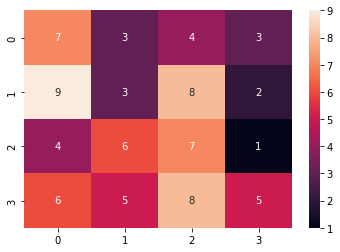

In [68]:
from sklearn.metrics import confusion_matrix
matrix= confusion_matrix(ytest, y_pred_nb)

sns.heatmap(matrix,annot = True, fmt = "d")

# Neural Networks

In [69]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(xtrain, ytrain)

print("Accuracy on training set: {:.2f}".format(mlp.score(xtrain, ytrain)))
print("Accuracy on test set: {:.2f}".format(mlp.score(xtest, ytest)))

Accuracy on training set: 0.45
Accuracy on test set: 0.42


In [70]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xtrain)
X_test_scaled = scaler.fit_transform(xtest)

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.850
Accuracy on test set: 0.765


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, ytrain)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, ytrain)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, ytest)))

Accuracy on training set: 0.838
Accuracy on test set: 0.802


In [72]:
best = 0
for _ in range(50):
    xtrain, xtest, ytrain, ytest = sklearn.model_selection.train_test_split(X_for_ML, label1, test_size =0.25)

    mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
    mlp.fit(X_train_scaled, ytrain)



    
    acc = tree.score(xtest, ytest)
    print("Accuracy: " + str(acc))

    # Save the highest accuracy
    if (acc > best):
        best = acc
#         with open("data1.pickle", "wb") as f:
#             pickle.dump(mlp, f)
print("Highest Accuracy:", best)

Accuracy: 0.7901234567901234
Accuracy: 0.7407407407407407
Accuracy: 0.7283950617283951
Accuracy: 0.8271604938271605
Accuracy: 0.8518518518518519
Accuracy: 0.7777777777777778
Accuracy: 0.7283950617283951
Accuracy: 0.7654320987654321
Accuracy: 0.7160493827160493
Accuracy: 0.7407407407407407
Accuracy: 0.8024691358024691
Accuracy: 0.7160493827160493
Accuracy: 0.8148148148148148
Accuracy: 0.7654320987654321
Accuracy: 0.8024691358024691
Accuracy: 0.8024691358024691
Accuracy: 0.7407407407407407
Accuracy: 0.7654320987654321
Accuracy: 0.7777777777777778
Accuracy: 0.7777777777777778
Accuracy: 0.7160493827160493
Accuracy: 0.7283950617283951
Accuracy: 0.7654320987654321
Accuracy: 0.8024691358024691
Accuracy: 0.8271604938271605
Accuracy: 0.8271604938271605
Accuracy: 0.8148148148148148
Accuracy: 0.7901234567901234
Accuracy: 0.7283950617283951
Accuracy: 0.7407407407407407
Accuracy: 0.8024691358024691
Accuracy: 0.7777777777777778
Accuracy: 0.8395061728395061
Accuracy: 0.7654320987654321
Accuracy: 0.67